In [15]:
# Tristan Nguyen
# @author: tristan (NGUYEN VU ANH TRUNG)
# email = "kivanolai@gmail.com"
"""
Problem walkthrough
In this problem, you will build a classifier with loan_status as a binary target. 
In order to achieve that, you should only include loans that are either 'Fully Paid' (your 0’s) or
'Charged Off' (your 1’s).
- Download the dataset from
https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1
Note: Rename to .csv the .gzip file you will get after extracting once, and use it as a
regular csv file.
1. Run a quick analysis of the data and drop the grade, sub_grade, interest related
columns and any other columns you think may cause information leakage.
2. Propose at least two possible modeling approaches –including examples– based on
your analysis, expand on the various pros and cons.
3. Choose one of the above approaches and implement your classifier, evaluate your
model using one or more metrics you think are suited for the problem.
4. Explain (as in “explainability”) your model in terms of the classifier’s features.
5. Discuss additional steps you would take if you had more time or resources, and any
other datasets you could use to enrich your original dataset.
6. [OPTIONAL] Discuss the scalability of your solution, in terms of the
a. Number of loans/rows in the training data.
b. Number of predictions a possible inference endpoint for the model will be asked
to make in production.
7. [OPTIONAL] Find a way to relate your predictions to the local/global shape of the
dataset, that is, data point clusters, graph node communities, etc..
"""


In [1]:
%pip install numpy
%pip install polars

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/python_mnist-0.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/python_mnist-0.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import polars as pl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/LCDataDictionary.xlsx
../input/Loan_status_2007-2020Q3.csv
../input/archive/.DS_Store


In [10]:
data_file_path  = "../input/Loan_status_2007-2020Q3.csv"
# Step 1: Load the data
# Load the data
# df = pl.scan_csv(data_file_path)
df = pl.read_csv(data_file_path,infer_schema_length=2000, null_values=["Loans that do not meet the credit policy"])

df.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,""" 36 months""",""" 10.65%""",162.87,"""B""","""B2""",null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,""" 60 months""",""" 15.27%""",59.83,"""C""","""C4""","""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""","""Charged Off""","""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,""" 36 months""",""" 15.96%""",84.33,"""C""","""C5""",null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,""" 36 months""",""" 13.49%""",339.31,"""C""","""C1""","""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,""" 60 months""",""" 12.69%""",67.79,"""B""","""B5""","""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",…,null,null,n

In [11]:
df.describe()

statistic,,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
str,f64,f64,f64,f64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,…,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",2.925493e6,2.925492e6,2.925492e6,2.925492e6,2.925492e6,"""2925492""","""2925492""",2.925492e6,"""2925492""","""2925492""","""2661406""","""2720272""","""2925492""",2.925488e6,"""2925492""","""2925492""","""2925492""","""2925492""","""2925492""","""2925492""","""2902167""","""2925491""","""2925492""",2.922384e6,2.925463e6,"""2925463""",2.925492e6,2.925492e6,2.925462e6,1.38899e6,427448.0,2.925463e6,2.925463e6,2.925492e6,"""2922832""",2.925463e6,…,"""2855216""","""2855061""","""2842343""",2.924127e6,2.925387e6,"""2855216""","""2875462""","""2875462""","""2855216""","""197823""","""197824""","""197824""","""197824""","""197824""","""197824""","""197824""","""194587""","""197824""","""197824""","""197824""","""197824""","""2887057""","""143638""","""143632""","""143635""","""143638""","""182076""","""143638""","""143638""","""143638""","""143638""","""143637""","""143411""","""179240""","""182076""","""182076""","""2925492"""
"""null_count""",0.0,1.0,1.0,1.0,1.0,"""1""","""1""",1.0,"""1""","""1""","""264087""","""205221""","""1""",5.0,"""1""","""1""","""1""","""1""","""1""","""1""","""23326""","""2""","""1""",3109.0,30.0,"""30""",1.0,1.0,31.0,1.536503e6,2.498045e6,30.0,30.0,1.0,"""2661""",30.0,…,"""70277""","""70432""","""83150""",1366.0,106.0,"""70277""","""50031""","""50031""","""70277""","""2727670""","""2727669""","""2727669""","""2727669""","""2727669""","""2727669""","""2727669""","""2730906""","""2727669""","""2727669""","""2727669""","""2727669""","""38436""","""2781855""","""2781861""","""2781858""","""2781855""","""2743417""","""2781855""","""2781855""","""2781855""","""2781855""","""2781856""","""2782082""","""2746253""","""2743417""","""2743417""","""1"""
"""mean""",86974.19494,9.7830e7,15358.775105,15354.704909,15340.046287,null,null,452.391358,null,null,null,null,null,79937.274015,null,null,null,null,null,null,null,null,null,19.29648,0.289701,null,700.51103,704.511235,0.554213,34.949602,74.706018,11.676163,0.176285,16964.840934,null,24.01835,…,null,null,null,0.122679,0.036142,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",80488.423604,5.1163e7,9478.383451,9477.144689,9480.634495,null,null,272.947849,null,null,null,null,null,111747.60871,null,null,null,null,null,null,null,null,null,15.719773,0.843682,null,33.765652,33.766533,0.859975,21.895388,26.451599,5.733312,0.524376,22996.213652,null,12.076252,…,null,null,null,0.353141,0.332452,null,null,null,null,n

In [23]:
filtered_df = df.drop_nulls(subset=df.columns)

In [24]:
filtered_df.describe()

statistic,,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
str,f64,f64,f64,f64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,…,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",107.0,107.0,107.0,107.0,107.0,"""107""","""107""",107.0,"""107""","""107""","""107""","""107""","""107""",107.0,"""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""",107.0,107.0,"""107""",107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,"""107""",107.0,…,"""107""","""107""","""107""",107.0,107.0,"""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107""","""107"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,…,"""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",56270.308411,1.4213e8,18653.504673,18653.504673,18650.934579,null,null,537.500935,null,null,null,null,null,66608.860374,null,null,null,null,null,null,null,null,null,29.461308,0.570093,null,675.420561,679.420561,0.906542,40.037383,80.523364,13.943925,1.046729,10341.635514,null,29.439252,…,null,null,null,0.953271,0.093458,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",36219.501521,1.5190e7,9059.964316,9059.964316,9060.392192,null,null,252.57764,null,null,null,null,null,36618.948851,null,null,null,null,null,null,null,null,null,21.340889,1.267237,null,17.47129,17.47129,1.077495,21.55201,23.431693,8.411394,0.252653,11701.594622,null,13.317018,…,null,null,null,0.3187,0.376997,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",362.0,1.04334944e8,3025.0,3025.0,3025.0,""" 36 months""",""" 7.96%""",100.06,"""A""","""A4""","""Account Manager""","""1 year""","""MORTGAGE""",3500.0,"""Not Verified""","""Apr-2017""","""Current""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Business""","""011xx""","""AR""",3.22,0.0,"""Apr-1988""",660.0,664.0,0.0,3.0,30.0,4.0,1.0,5.0,"""0%""",10

In [25]:
filtered_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
12757,118309395,19200,19200,19200.0,""" 60 months""",""" 30.94%""",632.32,"""G""","""G4""","""Admissions coordinator ""","""2 years""","""MORTGAGE""",50000.0,"""Source Verified""","""Sep-2017""","""Current""","""n""","""https://lendingclub.com/browse…","""debt_consolidation""","""Debt consolidation""","""707xx""","""LA""",52.06,0,"""Feb-2005""",660,664,3,57,53,20,1,23041,"""70%""",48,"""w""",…,"""7""","""95.3""","""60""",1,0,"""422550""","""164560""","""24900""","""144179""","""42537""","""585""","""589""","""Feb-2005""","""3""","""2""","""24""","""83.8""","""5""","""19""","""0""","""1""","""Y""","""CVD19SKIP""","""INCOMECURT""","""ACTIVE""","""2""","""0""","""Apr-2020""","""Jun-2020""","""Apr-2020""","""2""","""0""","""ACTIVE""","""718.79""","""14038.19""","""632.32""","""N"""
20811,118325515,24000,24000,24000.0,""" 60 months""",""" 15.05%""",571.59,"""C""","""C4""","""Owner""","""< 1 year""","""RENT""",34000.0,"""Not Verified""","""Sep-2017""","""Late (31-120 days)""","""n""","""https://lendingclub.com/browse…","""debt_consolidation""","""Debt consolidation""","""925xx""","""CA""",35.51,5,"""Apr-1988""",700,704,1,18,111,14,1,2574,"""9.1%""",18,"""w""",…,"""5""","""61.1""","""0""",1,0,"""71152""","""27132""","""19600""","""42852""","""8603""","""655""","""659""","""Apr-1988""","""0""","""0""","""12""","""25.6""","""4""","""11""","""0""","""0""","""N""","""ST0650PV01""","""UNEMPLOYED""","""COMPLETE""","""3""","""571.59""","""Jan-2019""","""Mar-2019""","""Jan-2019""","""3""","""25""","""DELINQUENT""","""645.18111""","""17730.24""","""300.08""","""N"""
21509,119196780,15000,15000,15000.0,""" 60 months""",""" 13.59%""",345.85,"""C""","""C2""","""RN""","""< 1 year""","""MORTGAGE""",50000.0,"""Not Verified""","""Sep-2017""","""Current""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Credit card refinancing""","""062xx""","""CT""",32.36,0,"""Jan-2003""",680,684,1,73,75,13,1,6107,"""38.4%""",42,"""w""",…,"""1""","""96.9""","""50""",1,0,"""244670""","""51909""","""5500""","""66570""","""16060""","""670""","""674""","""Dec-2000""","""2""","""4""","""12""","""45.4""","""2""","""29""","""0""","""0""","""Y""","""CVD19SKIP""","""INCOMECURT""","""ACTIVE""","""2""","""0""","""Apr-2020""","""Jun-2020""","""Apr-2020""","""2""","""0""","""ACTIVE""","""198.31""","""8771.92""","""345.85""","""N"""
22627,118339354,26000,26000,26000.0,""" 36 months""",""" 14.08%""",889.63,"""C""","""C3""","""Teacher""","""7 years""","""MORTGAGE""",65500.0,"""Verified""","""Sep-2017""","""Current""","""n"

In [26]:
# Step 2: Filter the data
filtered_df = df.filter(pl.col("loan_status").is_in(["Fully Paid", "Charged Off"]))


In [27]:
# Step 3: Encode the target variable
filtered_df.describe()


statistic,,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
str,f64,f64,f64,f64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,…,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",1.860331e6,1.860331e6,1.860331e6,1.860331e6,1.860331e6,"""1860331""","""1860331""",1.860331e6,"""1860331""","""1860331""","""1728877""","""1743135""","""1860331""",1.860331e6,"""1860331""","""1860331""","""1860331""","""1860331""","""1860331""","""1860331""","""1838925""","""1860330""","""1860331""",1.859223e6,1.860331e6,"""1860331""",1.860331e6,1.860331e6,1.86033e6,915215.0,308549.0,1.860331e6,1.860331e6,1.860331e6,"""1858933""",1.860331e6,…,"""1792804""","""1792650""","""1792151""",1.859634e6,1.860292e6,"""1792804""","""1813050""","""1813050""","""1792804""","""58631""","""58632""","""58632""","""58632""","""58632""","""58632""","""58632""","""57652""","""58632""","""58632""","""58632""","""58632""","""1850977""","""12695""","""12696""","""12695""","""12695""","""22049""","""12695""","""12695""","""12695""","""12695""","""12695""","""12684""","""19213""","""22049""","""22049""","""1860331"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""131454""","""117196""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""21406""","""1""","""0""",1108.0,0.0,"""0""",0.0,0.0,1.0,945116.0,1.551782e6,0.0,0.0,0.0,"""1398""",0.0,…,"""67527""","""67681""","""68180""",697.0,39.0,"""67527""","""47281""","""47281""","""67527""","""1801700""","""1801699""","""1801699""","""1801699""","""1801699""","""1801699""","""1801699""","""1802679""","""1801699""","""1801699""","""1801699""","""1801699""","""9354""","""1847636""","""1847635""","""1847636""","""1847636""","""1838282""","""1847636""","""1847636""","""1847636""","""1847636""","""1847636""","""1847647""","""1841118""","""1838282""","""1838282""","""0"""
"""mean""",102265.628325,7.2173e7,14588.272544,14582.177231,14564.667001,null,null,440.255886,null,null,null,null,null,77369.564789,null,null,null,null,null,null,null,null,null,18.567739,0.312875,null,697.678478,701.678642,0.612576,34.439362,71.670043,11.60594,0.208306,16285.408134,null,24.59665,…,null,null,null,0.132912,0.04968,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",92985.336707,4.4668e7,8970.471416,8967.822906,8969.318935,null,null,266.909376,null,null,null,null,null,117821.804004,null,null,null,null,null,null,null,null,null,13.091529,0.875457,null,32.708653,32.709396,0.901818,21.901007,26.469664,5.575507,0.590198,22468.1126,null,12.046282,…,null,null,null,0.372949,0.391777,null,null,null,null,null,null,null,null,null,null,null,null

In [29]:
# Assuming filtered_df is already defined
filtered_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,""" 36 months""",""" 10.65%""",162.87,"""B""","""B2""",null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,""" 60 months""",""" 15.27%""",59.83,"""C""","""C4""","""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""","""Charged Off""","""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,""" 36 months""",""" 15.96%""",84.33,"""C""","""C5""",null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,""" 36 months""",""" 13.49%""",339.31,"""C""","""C1""","""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,""" 60 months""",""" 12.69%""",67.79,"""B""","""B5""","""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",…,null,null,n

In [32]:
# %pip install matplotlib
%pip install seaborn

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/python_mnist-0.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


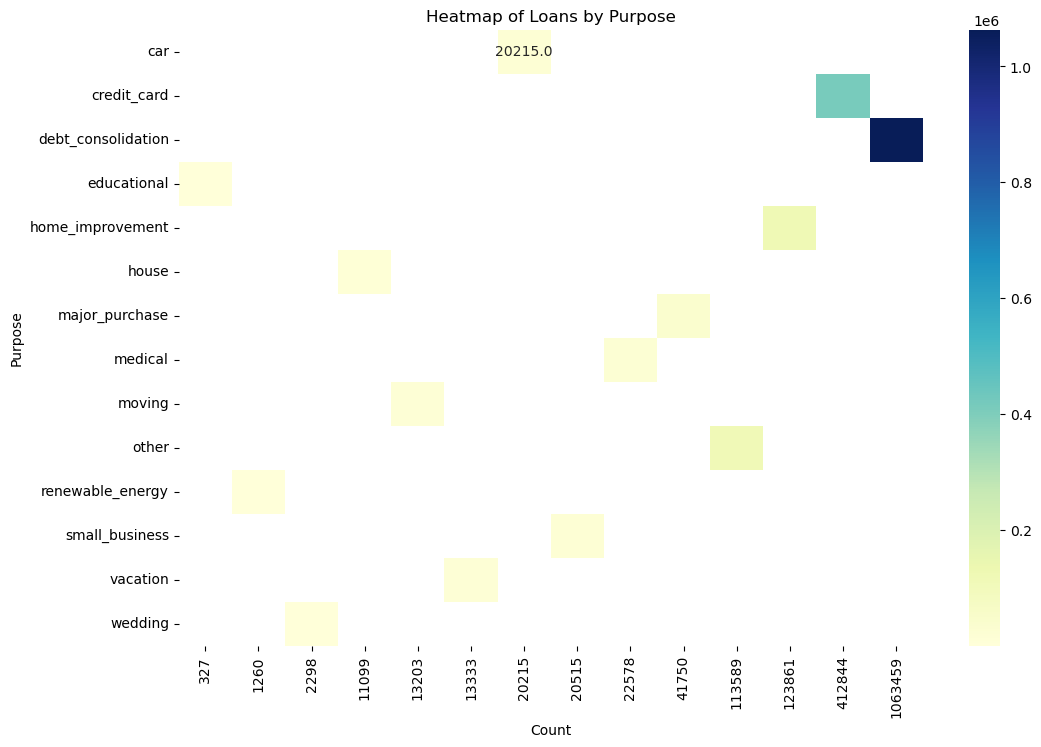

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df is already defined and is a Polars DataFrame
# Convert Polars DataFrame to Pandas DataFrame
filtered_df_pd = filtered_df.to_pandas()

# Group by 'purpose' and count the occurrences
purpose_counts = filtered_df_pd.groupby('purpose').size().reset_index(name='count')

# Create a pivot table for the heatmap
heatmap_data = purpose_counts.pivot(index='purpose', columns='count', values='count')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Loans by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

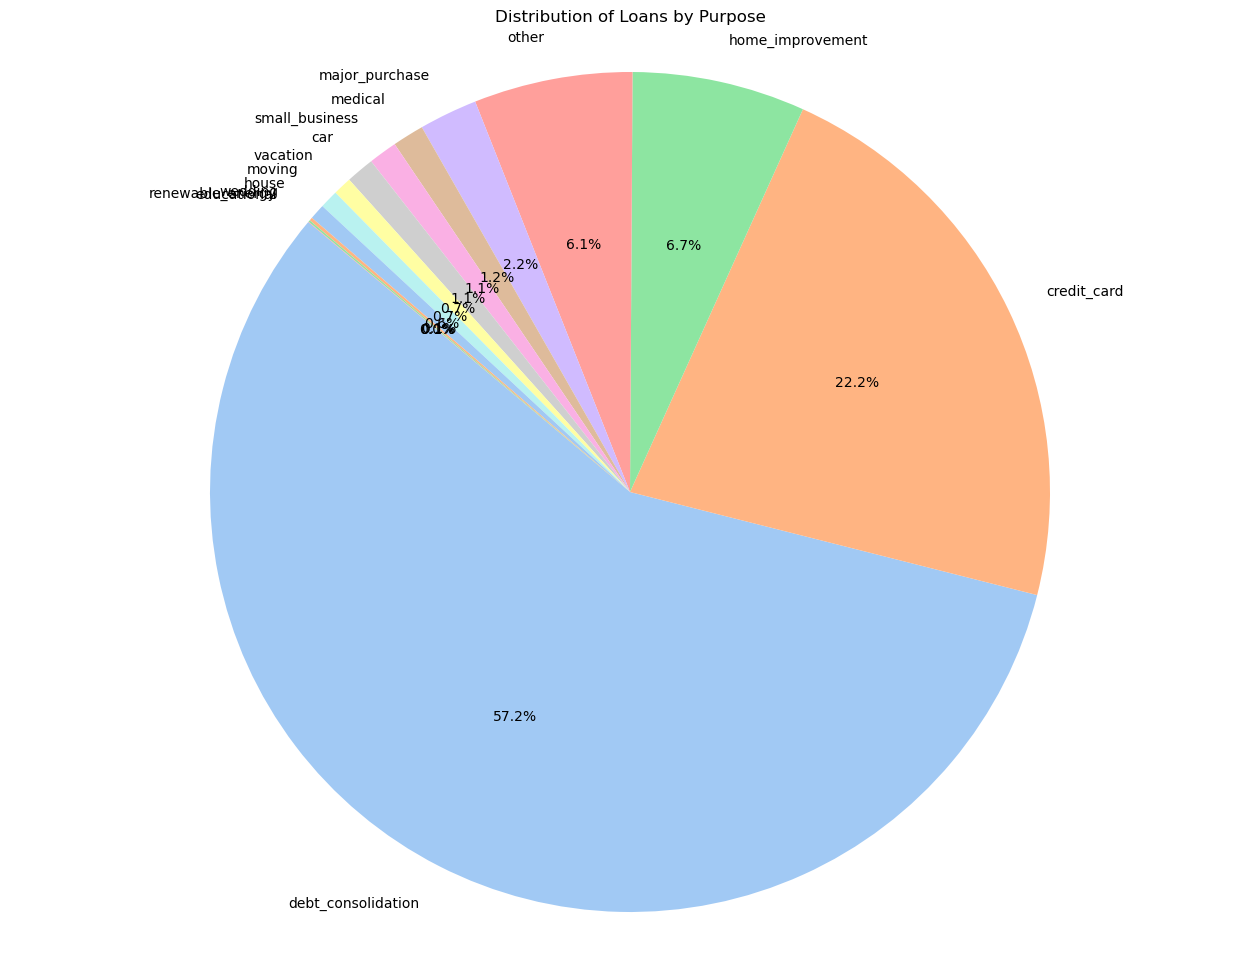

In [37]:
import matplotlib.pyplot as plt

# Assuming filtered_df_pd is already defined and is a Pandas DataFrame
# Group by 'purpose' and count the occurrences
purpose_counts = filtered_df_pd['purpose'].value_counts()

# Create a pie chart
plt.figure(figsize=(16, 12))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Loans by Purpose')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

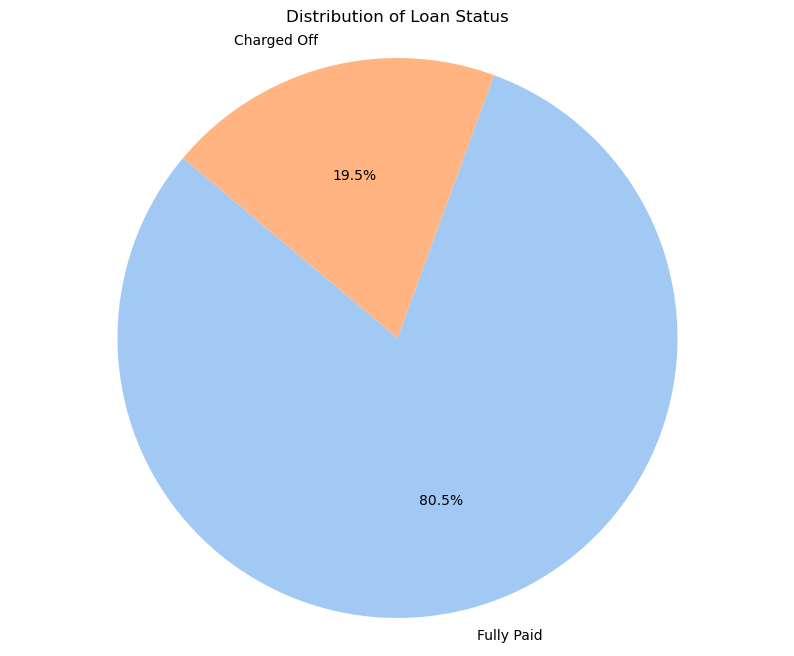

In [38]:
import matplotlib.pyplot as plt

# Assuming filtered_df_pd is already defined and is a Pandas DataFrame
# Group by 'loan_status' and count the occurrences
loan_status_counts = filtered_df_pd['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()